# Run LDA on Lemmatized Sentences

Goal is to use LDA for topic modeling.

Steps:

1. Exploratory analysis using a word cloud
1. Create a term-document matrix from the data.
1. Use the term-document matrix to create a corpus.
1. Create a vocabulary and map terms to their location in the term-document matrix.
1. Define the number of topics and the number of passes.
1. Attempt topic modeling with nouns only.
1. Attempt topic modeling with nouns and adjectives.
1. Analyze the topic determinations.
1. Identify the topics in each document.


In [51]:
import os

# Identify the working directory and data files
working_directory = './19-lda-lemmatized'

# Create the working directory if needed
try:
    os.makedirs(working_directory, exist_ok=True)
except OSError as error:
    print(f"Error creating {working_directory}: {error}")

In [52]:
processing_mode = 'Lemmatized'
input_directory = './16-data_preprocessing'
sentences_data_file = f"{input_directory}/sentences_data.csv"
bag_of_words_data_file = f"{input_directory}/bag_of_words_data.csv"

In [53]:
import pandas as pd
import csv

In [69]:
# Readthe preprocessed data into a dataframe
df = pd.read_csv(sentences_data_file, # The data file being read, from the variable assignment above
                 on_bad_lines='warn',           # This tells Pandas to only warn on bad lines vs causing an error
                 dtype='str')                   # This tells Pandas to treat all numbers as words

df.fillna("", inplace=True)
df.head(3)

,ROW_ID,DEVICE_PROBLEM_CODE,DEVICE_PROBLEM_TEXT,SENTENCIZED_FOI_TEXT,TOKENIZED_SENTENCES,NOPUNCT_SENTENCES,NOSTOPWORDS_SENTENCES,POS_SENTENCES,TOKEN_LEMMATIZED_SENTENCES,LEMMATIZED_SENTENCES,TOKEN_STEMMED_SENTENCES,STEMMED_SENTENCES
0,1969025,3283,Wireless Communication Problem,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,"['it', 'was', 'reported', 'that', 'the', 'tran...","['it', 'was', 'reported', 'that', 'the', 'tran...","['reported', 'transmitter', 'lost', 'connectio...","[('reported', 'VBN'), ('transmitter', 'NN'), (...","['report', 'transmitter', 'lose', 'connection'...",report transmitter lose connection pump great ...,"['report', 'transmitt', 'lost', 'connect', 'pu...",report transmitt lost connect pump greater 1 hour
1,1969025,3283,Wireless Communication Problem,THE TRANSMITTER ULTIMATELY REGAINED CONNECTIO...,"['the', 'transmitter', 'ultimately', 'regained...","['the', 'transmitter', 'ultimately', 'regained...","['transmitter', 'ultimately', 'regained', 'con...","[('transmitter', 'NN'), ('ultimately', 'RB'), ...","['transmitter', 'ultimately', 'regain', 'conne...",transmitter ultimately regain connection pump,"['transmitt', 'ultim', 'regain', 'connect', 'p...",transmitt ultim regain connect pump
2,1969025,3283,Wireless Communication Problem,NO ADDITIONAL PATIENT OR EVENT INFORMATION WA...,"['no', 'additional', 'patient', 'or', 'event',...","['no', 'additional', 'patient', 'or', 'event',...","['additional', 'patient', 'event', 'informatio...","[('additional', 'JJ'), ('patient', 'NN'), ('ev...","['additional', 'patient', 'event', 'informatio...",additional patient event information available,"['addit', 'patient', 'event', 'inform', 'avail']",addit patient event inform avail


In [55]:
# Read the bag of words into a pandas dataframe
bow_df = pd.read_csv(bag_of_words_data_file, # The data file being read, from the variable assignment above
                 on_bad_lines='warn',           # This tells Pandas to only warn on bad lines vs causing an error
                 dtype='str')                   # This tells Pandas to treat all numbers as words

tokens = list(bow_df.columns)
len(tokens)

1197

## 1. Exploratory analysis using a word cloud

In [56]:
%pip install --quiet wordcloud

Note: you may need to restart the kernel to use updated packages.


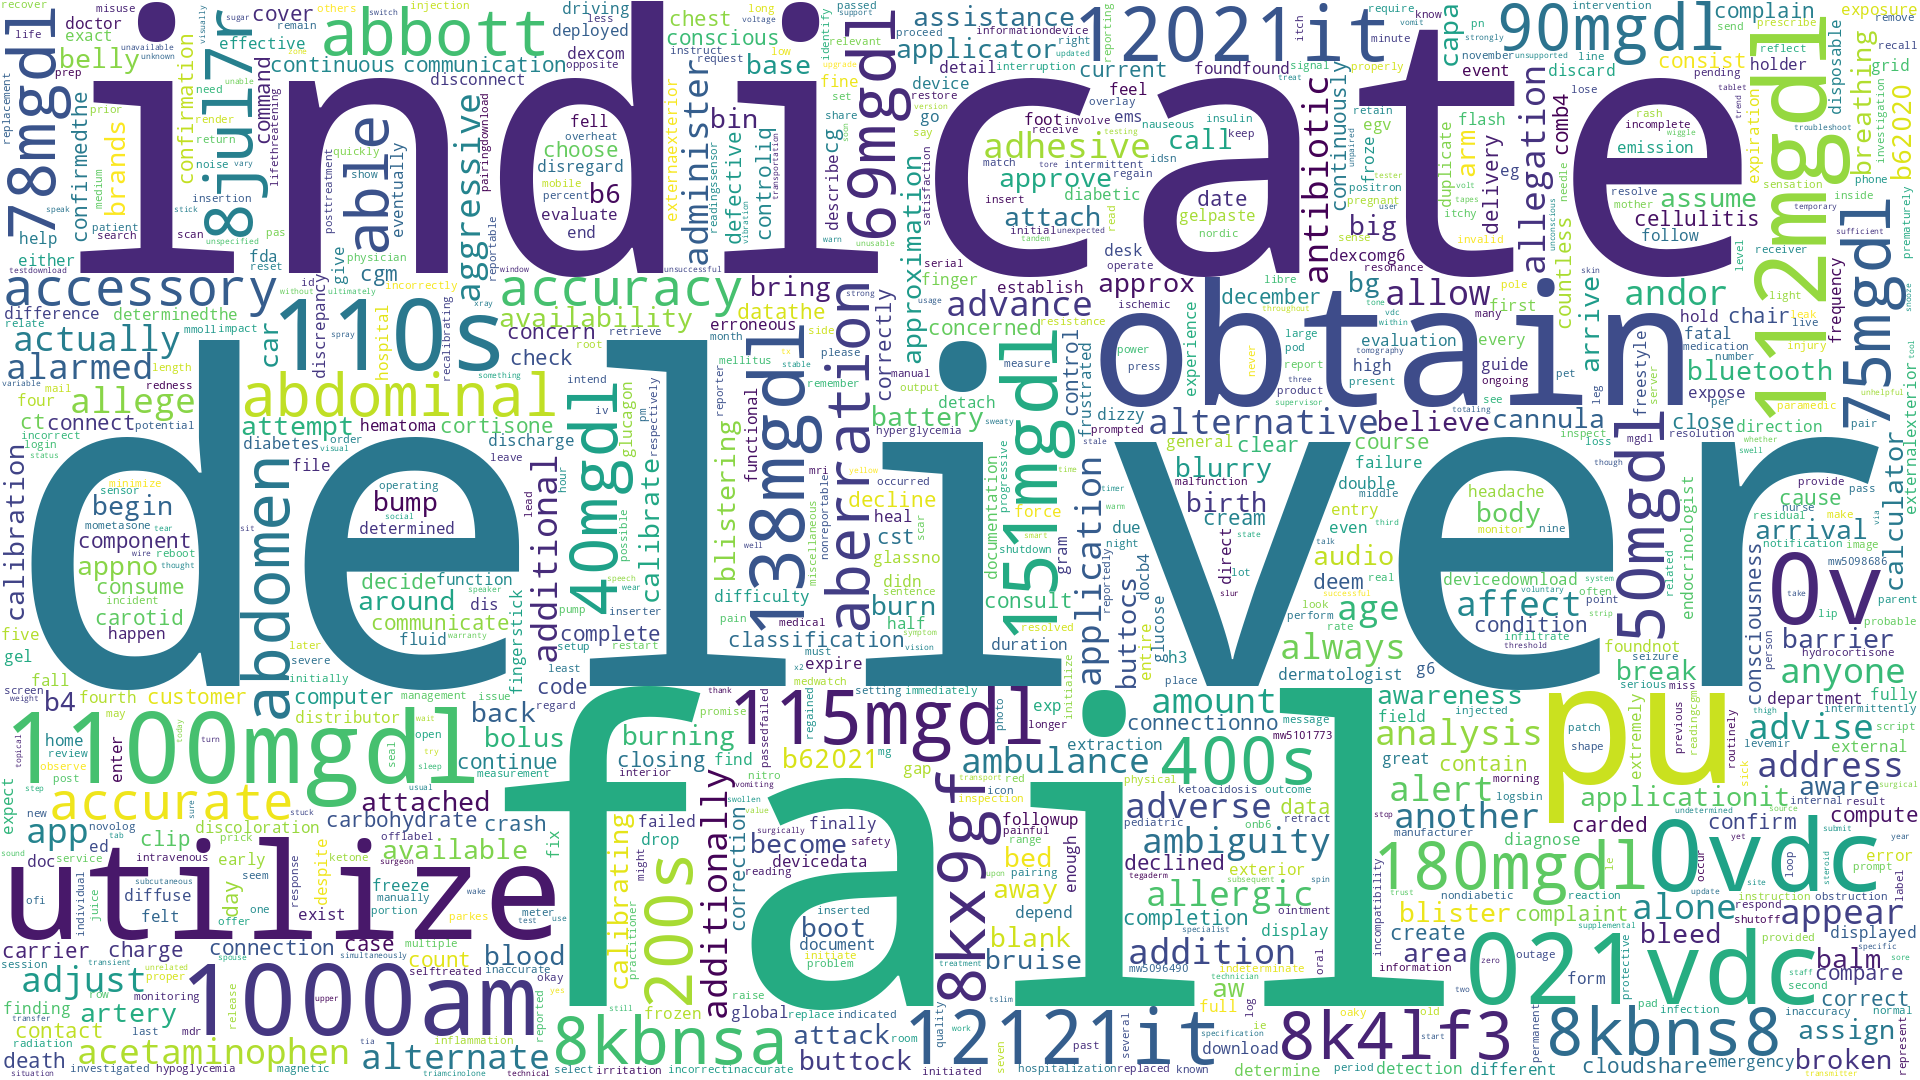

In [66]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(tokens)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=1920, height=1080)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Remove words that start with a digit

In [58]:
import re

# create a regular expression pattern to match words that start with numbers
pattern = re.compile(r'^\d+')

# filter out words that start with numbers
tokens_nonumbers = [word for word in tokens if not pattern.match(word)]

len(tokens_nonumbers)

921

In [67]:
print(f"{len(tokens) - len(tokens_nonumbers)} words were removed")

276 words were removed


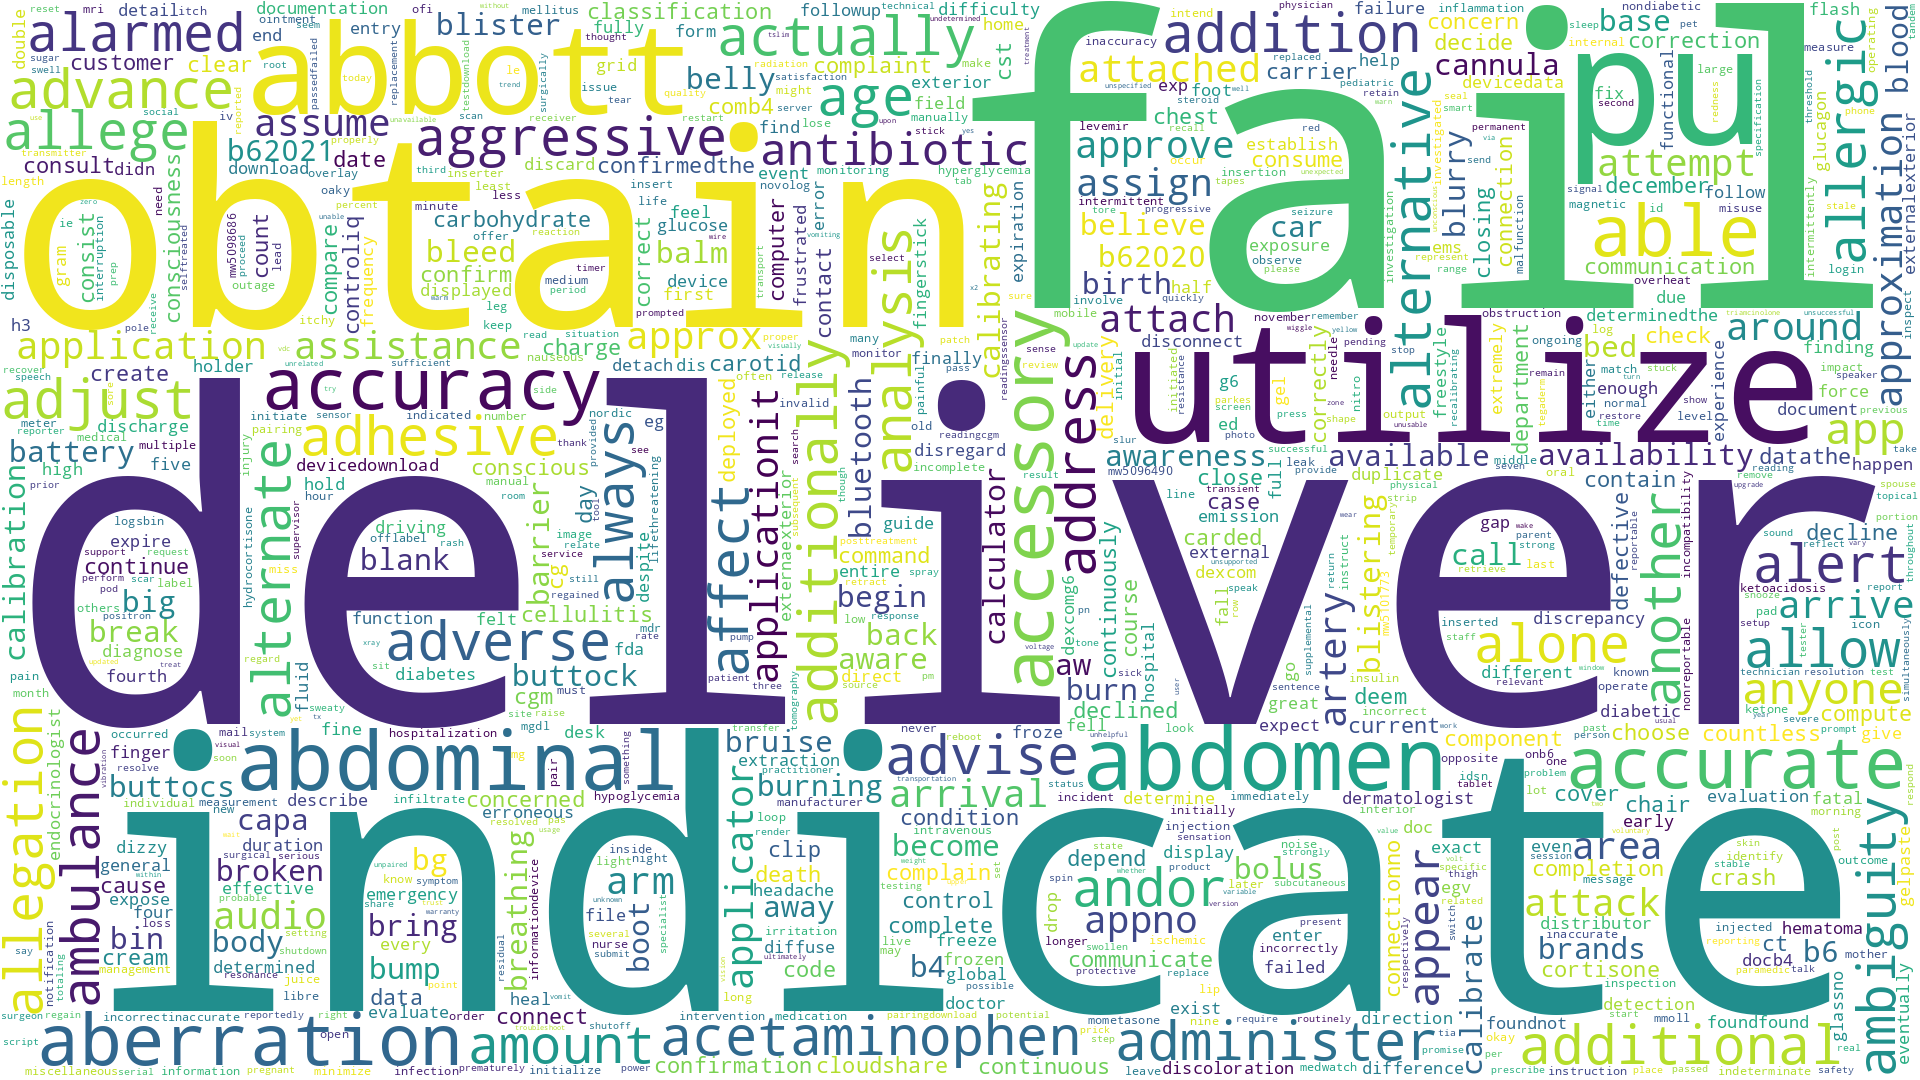

In [65]:
# Join the different processed titles together.
long_string = ','.join(corpus_nonumbers)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=1920, height=1080)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## 1. Create a term-document matrix from the data.

In [18]:
%pip install --quiet --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


In [68]:
import gensim

# Transform to gensim dictionary
dic = gensim.corpora.Dictionary(df['TOKEN_STEMMED_SENTENCES']) 

bow_corpus = [dic.doc2bow(word) for word in corpus_nonumbers]

import pickle # Useful for storing big datasets
pickle.dump(bow_corpus, open('corpus.pkl', 'wb'))
dic.save('dictionary.gensim')

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

## 2. Use the term-document matrix to create a corpus.

## 3. Create a vocabulary and map terms to their location in the term-document matrix.

## 4. Define the number of topics and the number of passes.

## 5. Attempt topic modeling with nouns only.

## 6. Attempt topic modeling with nouns and adjectives.

## 7. Analyze the topic determinations.

## 8. Identify the topics in each document.